# Answer-1

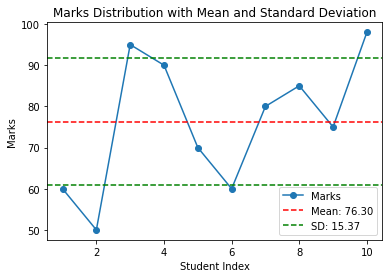

In [1]:
import csv
import math
import matplotlib.pyplot as plt

# Read the CSV file and extract 'Mark' values
names = []
marks = []
with open('marks.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    for row in reader:
        names.append(row[0])
        marks.append(float(row[1]))

# Calculate Mean 
def calculate_mean(data):
    total = sum(data)
    count = len(data)
    return total / count

mean = calculate_mean(marks)

# Calculate Variance
def calculate_variance(data, mean):
    total = sum((x - mean) ** 2 for x in data)
    count = len(data)
    return total / count

variance = calculate_variance(marks, mean)

# Calculate Standard Deviation (Square root of variance)
def calculate_std_dev(variance):
    return math.sqrt(variance)

std_dev = calculate_std_dev(variance)

# Write the Mean, Variance, and Standard Deviation to a new CSV file
with open('statistics.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Mean', 'Variance', 'Standard Deviation'])
    writer.writerow([mean, variance, std_dev])

# Step 6: Plotting the Graph
# X-axis as index, Y-axis as Marks
x = list(range(1, len(marks) + 1))

# Plot the Marks
plt.plot(x, marks, marker='o', label='Marks')

# Add mean and SD lines
plt.axhline(y=mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axhline(y=mean + std_dev, color='g', linestyle='--', label=f'SD: {std_dev:.2f}')
plt.axhline(y=mean - std_dev, color='g', linestyle='--')

# Label the graph
plt.title('Marks Distribution with Mean and Standard Deviation')
plt.xlabel('Student Index')
plt.ylabel('Marks')
plt.legend()

# Show the graph
plt.show()


# Answer-2

In [2]:
def set_two_msbs(n):
    # Find the bit length of the number
    bits = n.bit_length()

    # Calculate the mask by setting the two most significant bits to 1
    mask = (1 << (bits - 1)) | (1 << (bits - 2))

    # Apply the mask using bitwise OR to set the two MSBs to 1
    modified_number = n | mask

    # Print the result in decimal and binary formats
    print("Original number:", n)
    print("Modified number (Decimal):", modified_number)
    print("Modified number (Binary):", bin(modified_number))

# Get input from the user
number = int(input("Enter a number: "))

# Call the function to set two MSBs and print the result
set_two_msbs(number)


Enter a number: 10
Original number: 10
Modified number (Decimal): 14
Modified number (Binary): 0b1110


# Answer-3

In [3]:
def calculate_notes(amount):
    # Available denominations in descending order
    denominations = [2000, 500, 200, 100, 50, 20, 10, 5, 2, 1]

    # Dictionary to store the number of notes for each denomination
    note_count = {}

    # Iterate over each denomination to calculate how many notes are required
    for note in denominations:
        if amount >= note:
            note_count[note] = amount // note  # Calculate the number of notes for current denomination
            amount = amount % note  # Reduce the amount by the value of those notes

    # Display the notes breakdown
    print("Breakdown of notes:")
    for note, count in note_count.items():
        print(f"{note} : {count} notes")

# Input: The amount the shopkeeper needs to return
balance_amount = int(input("Enter the balance amount: "))

# Call the function to calculate the minimum notes
calculate_notes(balance_amount)


Enter the balance amount: 1300
Breakdown of notes:
500 : 2 notes
200 : 1 notes
100 : 1 notes


# Answer-4

In [5]:
def caesar_cipher(text, shift):
    encrypted_text = []
    for char in text:
        # Shift only alphabetic characters, ignoring others
        if char.isalpha():
            shift_base = ord('a') if char.islower() else ord('A')
            shifted_char = chr(shift_base + (ord(char) - shift_base + shift) % 26)
            encrypted_text.append(shifted_char)
        else:
            encrypted_text.append(char)  # Non-alphabetical characters are not shifted
    return ''.join(encrypted_text)

def xor_encrypt(text, salt):
    salt_len = len(salt)
    encrypted_text = []
    for i, char in enumerate(text):
        # XOR with the corresponding character in the salt, cycling through the salt
        encrypted_char = chr(ord(char) ^ ord(salt[i % salt_len]))
        encrypted_text.append(encrypted_char)
    return ''.join(encrypted_text)

def encrypt_file(filename, shift, salt):
    # Read the content from the file
    with open(filename, 'r') as file:
        original_text = file.read()

    # Step 1: Encrypt using Caesar cipher
    caesar_encrypted = caesar_cipher(original_text, shift)

    # Step 2: Apply XOR encryption using the salt
    final_encrypted = xor_encrypt(caesar_encrypted, salt)

    # Step 3: Write the encrypted content to a new file
    output_filename = f"{filename.split('.')[0]}_enc.txt"
    with open(output_filename, 'w') as encrypted_file:
        encrypted_file.write(final_encrypted)

    print(f"Encryption complete! Encrypted file: {output_filename}")

# Example usage
if __name__ == "__main__":
    file_to_encrypt = 'input2.txt'  # The file you want to encrypt
    shift_value = 3                # Caesar cipher shift
    xor_salt = 'abc'               # Salt for XOR encryption
    encrypt_file(file_to_encrypt, shift_value, xor_salt)


Encryption complete! Encrypted file: input2_enc.txt


# Answer-5

# Using Inbuilt Function


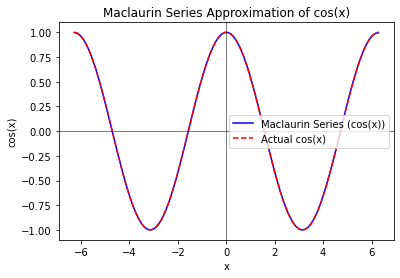

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Define the function to calculate cos(x) using Maclaurin Series
def cos_maclaurin(x, terms=10):
    """Calculate cos(x) using the Maclaurin series expansion."""
    result = 0
    for n in range(terms):
        # (-1)^n * x^(2n) / (2n)!
        term = math.pow(-1, n) * math.pow(x, 2 * n) / math.factorial(2 * n)
        result += term
    return result

# Define the range of x values (from -2π to 2π)
x_values = np.linspace(-2 * np.pi, 2 * np.pi, 100)

# Calculate the cos(x) using Maclaurin series
maclaurin_cos_values = [cos_maclaurin(x, terms=10) for x in x_values]

# Plot the Maclaurin series approximation
plt.plot(x_values, maclaurin_cos_values, label='Maclaurin Series (cos(x))', color='b')

# Plot the actual cos(x) using numpy for reference
actual_cos_values = np.cos(x_values)
plt.plot(x_values, actual_cos_values, label='Actual cos(x)', color='r', linestyle='--')

# Add titles and labels
plt.title('Maclaurin Series Approximation of cos(x)')
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()

# Show the plot
plt.show()


# Answer-6

In [8]:
import json

def compare_json(json1, json2, path=""):
    differences = {}
    
    # Iterate over the keys in json1
    for key in json1:
        current_path = f"{path}/{key}" if path else key
        
        # If the key exists in both JSON objects
        if key in json2:
            if isinstance(json1[key], dict) and isinstance(json2[key], dict):
                # If both values are dictionaries, compare recursively
                sub_diff = compare_json(json1[key], json2[key], current_path)
                if sub_diff:
                    differences[current_path] = sub_diff
            elif json1[key] != json2[key]:
                # If the values are different, log the difference
                differences[current_path] = {"json1_value": json1[key], "json2_value": json2[key]}
        else:
            # If the key is missing in json2
            differences[current_path] = {"json1_value": json1[key], "json2_value": "Missing in json2"}

    # Check for keys in json2 that are not in json1
    for key in json2:
        current_path = f"{path}/{key}" if path else key
        if key not in json1:
            differences[current_path] = {"json1_value": "Missing in json1", "json2_value": json2[key]}

    return differences

# Example usage
if __name__ == "__main__":
    json1 = {
        "name": "Alice",
        "age": 30,
        "address": {
            "city": "Wonderland",
            "zipcode": "12345"
        },
        "skills": ["Python", "Machine Learning"]
    }

    json2 = {
        "name": "Alice",
        "age": 28,
        "address": {
            "city": "Wonderland",
            "zipcode": "54321"
        },
        "skills": ["Python", "Data Science"]
    }

    diff = compare_json(json1, json2)

    print(json.dumps(diff, indent=4))


{
    "age": {
        "json1_value": 30,
        "json2_value": 28
    },
    "address": {
        "address/zipcode": {
            "json1_value": "12345",
            "json2_value": "54321"
        }
    },
    "skills": {
        "json1_value": [
            "Python",
            "Machine Learning"
        ],
        "json2_value": [
            "Python",
            "Data Science"
        ]
    }
}
